# Анализ факторов влияющих на успешность компьютерной игры.

## О проекте:
Интернет-магазин «Стримчик», продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, *Xbox* или *PlayStation*).

### Задача
Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Описание данных
- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales —* продажи в Северной Америке (миллионы проданных копий)
- *EU_sales* — продажи в Европе (миллионы проданных копий)
- *JP_sales* — продажи в Японии (миллионы проданных копий)
- *Other_sales —* продажи в других странах (миллионы проданных копий)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации *ESRB* (англ. *Entertainment Software Rating Board).* Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

### План работы
**Шаг 1. Откроем файл с данными и изучим общую информацию**

Путь к файлу: */datasets/games.csv*. [Скачать датасет](https://code.s3.yandex.net/datasets/games.csv)

**Шаг 2. Подготовим данные**

- Заменить названия столбцов (привести к нижнему регистру);
- Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему;
- Обработать пропуски при необходимости:
    - Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Описать причины, которые могли привести к пропускам;
    - Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрать это значение и описать, как его обработать;
- Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

**Шаг 3. Проведём исследовательский анализ данных**

- Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Взять данные за соответствующий **актуальный период.** Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывать в работе данные за **предыдущие годы**.
- Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
- Соотнести выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Шаг 4. Составим портрет пользователя каждого региона**

Определить для пользователя каждого региона (*NA, EU, JP*):

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Шаг 5. Проверим гипотезы**

- Средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые;
- Средние пользовательские рейтинги жанров *Action* (англ. «действие», экшен-игры) и *Sports* (англ. «спортивные соревнования») разные.

Задать самостоятельно пороговое значение *alpha*.

Пояснить:

- Как сформулировал нулевую и альтернативную гипотезы;
- Какой критерий применил для проверки гипотез и почему.

**Шаг 6. Напишем общий вывод**

## Изучение общей информации о датасете.

- [x]  Подключить необходимые библиотеки.
- [x]  Ознакомиться с данными на основе 5 строчек датафрейма.
- [x]  Ознакомиться с информацией о датафрейме.
- [x]  Изучить инфомацию о пропусках.
- [x]  Проверить датафрейм на наличие явных дубликатов.

In [1]:
#Подключаем необходимые библиотеки.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy import stats as st
from collections import Counter
from scipy.stats import ttest_1samp, ttest_ind
from scipy.stats import levene
plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
#Загружаем датасет.
data = pd.read_csv('/datasets/games.csv')

#Создадим переменную df для того, чтобы отслеживать изменения датафрейма после очистки данных.
df = data.copy()

In [3]:
#Выводем первые 5 строк датасета на экран.
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
#Выводим информацию о датасете.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видим NaN в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.
А также некорректные типы значений в Year_of_Release, User_Score и, возможно Critic_Score.

In [5]:
#Выведем информацию о столбцах с пропущенными значениями.
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Нулевые значения', 1 : 'Пропущенные значения', 2 : '% от всех значений'})
        mz_table['Всего нулевых и пропущенных значений'] = mz_table['Нулевые значения'] + mz_table['Пропущенные значения']
        mz_table['% всех нулевых и пропущенных значений'] = 100 * mz_table['Всего нулевых и пропущенных значений'] / len(df)
        mz_table['Тип данных'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% от всех значений', ascending=False).round(1)
        print ("Датасет содержит " + str(df.shape[1]) + " столбцов и " + str(df.shape[0]) + " строк.\n"      
            "Из них " + str(mz_table.shape[0]) +
              " столбцов с пропущенными значениями.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df)

Датасет содержит 11 столбцов и 16715 строк.
Из них 6 столбцов с пропущенными значениями.


,Нулевые значения,Пропущенные значения,% от всех значений,Всего нулевых и пропущенных значений,% всех нулевых и пропущенных значений,Тип данных
Critic_Score,0,8578,51.3,8578,51.3,float64
Rating,0,6766,40.5,6766,40.5,object
User_Score,0,6701,40.1,6701,40.1,object
Year_of_Release,0,269,1.6,269,1.6,float64
Name,0,2,0.0,2,0.0,object
Genre,0,2,0.0,2,0.0,object


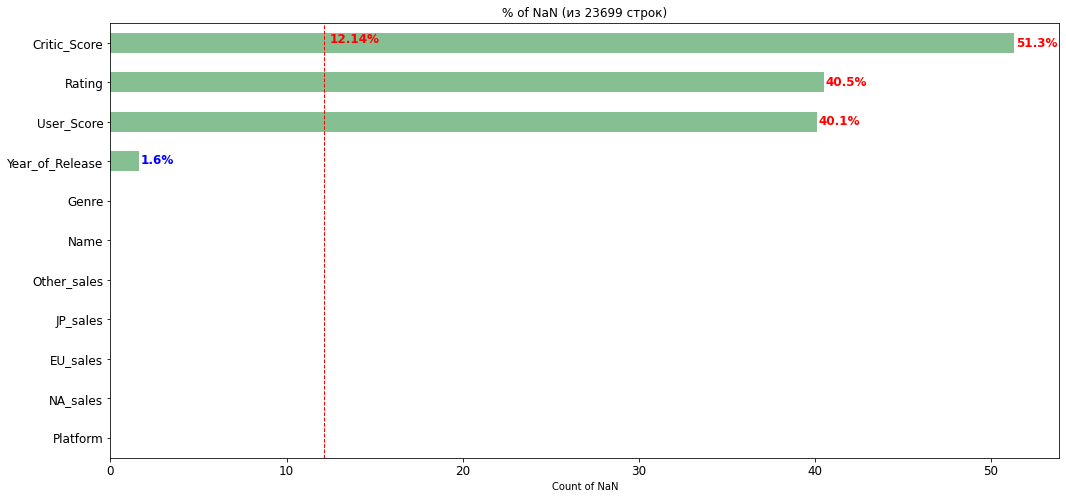

In [6]:
#Визуализируем количество пропусков в датасете.

def percent_hbar(df, old_threshold=None):
    percent_of_nulls = (df.isnull().sum()/len(df)*100).sort_values().round(1)
    threshold = percent_of_nulls.mean()
    ax = percent_of_nulls.plot(kind='barh', figsize=(17, 8), title='% of NaN (из 23699 строк)', 
                               color='#86bf91', legend=False, fontsize=12)
    ax.set_xlabel('Count of NaN')
    dict_percent = dict(percent_of_nulls)
    i = 0
    for k in dict_percent:
        color = 'blue'
        if dict_percent[k] > 0:
            if dict_percent[k] > threshold:
                color = 'red'
            ax.text(dict_percent[k]+0.1, i + 0.09, str(dict_percent[k])+'%', color=color, 
                    fontweight='bold', fontsize='large')
        i += 0.98
    if old_threshold is not None:
        plt.axvline(x=old_threshold,linewidth=1, color='r', linestyle='--')
        ax.text(old_threshold+0.3, 10, '{0:.2%}'.format(old_threshold/100), color='r', fontweight='bold', fontsize='large')
        plt.axvline(x=threshold,linewidth=1, color='green', linestyle='--')
        ax.text(threshold+0.3, 10, '{0:.2%}'.format(threshold/100), color='green', fontweight='bold', fontsize='large')
    else:
        plt.axvline(x=threshold,linewidth=1, color='r', linestyle='--')
        ax.text(threshold+0.3, 10, '{0:.2%}'.format(threshold/100), color='r', fontweight='bold', fontsize='large')
    return ax, threshold

plot, threshold = percent_hbar(data)

In [7]:
#Посчитаем количество дубликатов
print('\nКоличество явных дубликатов:', df.duplicated().sum())


Количество явных дубликатов: 0


Cредний процент содержания пропусков в столбцах - равен почти 12,14%.

3 столбца имеют существенно больший процент (от 40.1% и до 51.3%) пропущенных значений.

Выводы по столбцам:
* Name - привести название столбца к нижнему регистру, пропущенные значения.
* Platform - привести название столбца к нижнему регистру.
* Year_of_Release - привести название столбца к нижнему регистру, пропущенные значения, привести к целочисленному типу.
* Genre - привести название столбца к нижнему регистру, пропущенные значения.
* NA_sales - привести название столбца к нижнему регистру.
* EU_sales - привести название столбца к нижнему регистру.
* JP_sales - привести название столбца к нижнему регистру.
* Other_sales - привести название столбца к нижнему регистру.
* Critic_Score - привести название столбца к нижнему регистру, пропущенные значения, привести к целочисленному типу.
* User_Score - привести название столбца к нижнему регистру, пропущенные значения, привести к целочисленному типу.
* Rating - привести название столбца к нижнему регистру, пропущенные значения.

Явных дубликатов нет.

## Предобработка данных.

- [x]  Заменить названия столбцов (привести к нижнему регистру);
- [x]  Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрать это значение и описать, как его обработать;
- [x]  Обработать пропуски при необходимости.
- [x]  Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;
- [x]  Описать причины, которые могли привести к пропускам;
- [x]  Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему;
- [x]  Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

### Обработка датасета.

#### Изменение регистра названий столбцов.

In [8]:
#Приводим столбцы к нижнему регистру.
df.columns = df.columns.map(lambda x: x.lower())
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Все строки приведены к нижнему регистру.

#### Обработка столбца name.

In [9]:
#Выведем строки с пропущенными значениями в столбце name.
df.loc[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Cтолбец name отвечает за название компьютерной игры.
Пропуски платформы Gen в 1993 году. Почти по всем колонкам пропуск. Продажи маленькие.
По данной ячейке мы не можем рассчитать среднее значение или медиану. Оставить его пустым тоже нельзя, т.к. непонятно о какой видеоигре идет речь, поэтому мы принимаем решение удалить эти 2 строки, иначе они повлияют на нашу статистику. На счет появления пропуска в данном столбце можно сказать, что или его забыли указать при заведении данных.

При обработке пропусков в столбце name, также уйдут и пропуски в genre.

In [10]:
#Удаляем в столбце name строки с пропусками.
df=df.dropna(subset=['name'])
#Проверяем наличие пропусков.
print('\nКоличество пропусков в name:', df['name'].isnull().sum())
print('\nКоличество пропусков в genre:', df['genre'].isnull().sum())


Количество пропусков в name: 0

Количество пропусков в genre: 0


In [11]:
#Считаем долю чистых значений.
print('Доля чистых значений составила: {:.1%}'. format(len(df) / len(data)))

Доля чистых значений составила: 100.0%


Пропуски удалены без существенной потери в данных.

#### Обработка столбца year_of_release.

In [12]:
#Изменим тип данных в столбце year_of_release.
df['year_of_release'] = df['year_of_release'].astype('Int64')
df.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Так как год не может быть дробным, значения year_of_release привели к целочисленному типу. Он менее ресурсозатратен.

In [13]:
#Выведем количество пропусков year_of_release.
print('\nКоличество пропусков в year_of_release:', df['year_of_release'].isnull().sum())


Количество пропусков в year_of_release: 269


In [14]:
#Выведем строки с пропущенными значениями в столбце year_of_release.
df.loc[df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [15]:
#Выведем количество всех значений name, чтобы понять, выпускались ли игры на разных платформах.
df['name'].value_counts()

Need for Speed: Most Wanted    12
LEGO Marvel Super Heroes        9
Madden NFL 07                   9
Ratatouille                     9
FIFA 14                         9
                               ..
Zwei!!                          1
Bomberman Hero                  1
Pokemon Stadium                 1
Doki-Doki Universe              1
Arthur! Ready to Race           1
Name: name, Length: 11559, dtype: int64

In [16]:
# Возьмем одну из игр с неуказанным годом и проверим, выпускалась ли она на других платформах.
df.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Некоторые игры выпускались на нескольких платформах. Появилась идея заполнить пропуски данными по тем де играм, но на других платформах. Однако по некоторым играм может быть разброс в год и более, поэтому делать так не будем. 

Избавимся от пропусков в столбце year_of_release, так как пропусков всего 1,6%. Мы потеряем немного данных.

In [17]:
#Удаляем в столбце year_of_release строки с пропусками.
df=df.dropna(subset=['year_of_release'])
#Проверяем наличие пропусков.
print('\nКоличество пропусков в name:', df['year_of_release'].isnull().sum())

#Считаем долю чистых значений.
print('Доля чистых значений составила: {:.1%}'. format(len(df) / len(data)))


Количество пропусков в name: 0
Доля чистых значений составила: 98.4%


Избавились от пропусков в year_of_release с потерей всего 1,6% данных.

Пропуски могли появиться из-за ошибки или точная дата выхода игры точно не определена.

#### Обработка столбцов user_score, critic_score и rating.

In [18]:
#Выводим список уникальных значений user_score.
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим оценки от 0 до 10, пропущенные значения, а также "tbd".

Поисковый запрос даёт понять, что эта аббревиатура означает 'To Be Determined' - 'Будет определено'.
Будем считать его пропущенным значением и заменим на 'NaN'.

In [19]:
#Заменяем tbd на NaN.
df['user_score']=df['user_score'].replace('tbd','Nan') 
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'Nan', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [20]:
#Изменим тип данных в столбце user_score.
df['user_score']=df['user_score'].astype('float64')
df.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Заменили значение tbd в столбце user_score на Nan, так как фактически tbd означает отсутствие данных на данный момент. Также изменили тип данных на float64, так как теперь столбец содержит числа с десятичными дробями.

In [21]:
#Выведем количество пропусков user_score.
print('\nКоличество пропусков в user_score:', df['user_score'].isnull().sum())
#Выведем количество пропусков user_score.
print('\nКоличество пропусков в critic_score:', df['critic_score'].isnull().sum())
#Выведем количество пропусков user_score.
print('\nКоличество пропусков в rating:', df['rating'].isnull().sum())


Количество пропусков в user_score: 8981

Количество пропусков в critic_score: 8461

Количество пропусков в rating: 6676


Пропусков слишком много, чтобы мы просто избавились от этих строк. Так мы потеряем в user_score 40.1%, в critic_score 51.3%, а в rating 40.5% данных. Нужно посмотреть, есть ли закономерности в пропусках.

In [22]:
#Выведем строки с пропущенными значениями в столбце user_score.
df.loc[df['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [23]:
#Выведем строки с пропущенными значениями в столбце critic_score.
df.loc[df['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [24]:
#Выведем строки с пропущенными значениями в столбце critic_score.
df.loc[df['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Можно было бы заменить пропуски данными с оценок пользователей по играм с таким же названием но на других платформах. Для этого проверим, отличаются ли значения user_score, critic_score и rating в играх с одинаковым названием.

In [25]:
#Выводим одну из игр с большим количеством дубликатов названий.
df.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Да, значения сильно отличаются поэтому просто оставим пропуски в user_score, critic_score при анализе просто будем фильтровать их.

Пропуске в столбце rating могут быть как следствием ошибки, так и по одной из 2-х причин: игра выпущена до 1994 (основание ассоциации Entertainment Software Association), так и онлайн игры (они не оцениваются). ПОэтому поставим заглушку с отрицательным значением на пропуски в rating.

In [26]:
#Заменяем в rating NaN на -9999.
df['rating'] = df['rating'].fillna(value='no_rating')
df['rating'].unique()

array(['E', 'no_rating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Оставили пропуски в user_score, critic_score и в rating, так как заполнение их синтетическими значениями приведёт к искажению результатов анализа, а удаление их к потере большого количества данных.

Пропуски в столбце rating заменили на заглушку no_rating, чтобы иметь возможность анализировать влияние рейтинга на продажи в дальнейшем.

Есть интересная закономерность в том, что часто оценки пользователей, критиков и рейтинга отсутствуют в одной и той же записи. Так как других закономерностей, которые объясняли бы пропуски, я не увидел, вероятнее всего отсутствие данных связано с ошибкой выгрузки или хранения.

#### Промежуточный вывод.

In [27]:
#Вызываем функцию missing_zero_values_table, чтобы посмотреть пропущенные значения.
missing_zero_values_table(df)

Датасет содержит 11 столбцов и 16444 строк.
Из них 2 столбцов с пропущенными значениями.


,Нулевые значения,Пропущенные значения,% от всех значений,Всего нулевых и пропущенных значений,% всех нулевых и пропущенных значений,Тип данных
user_score,1,8981,54.6,8982,54.6,float64
critic_score,0,8461,51.5,8461,51.5,float64


In [28]:
#Выводим информацию о датасете.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


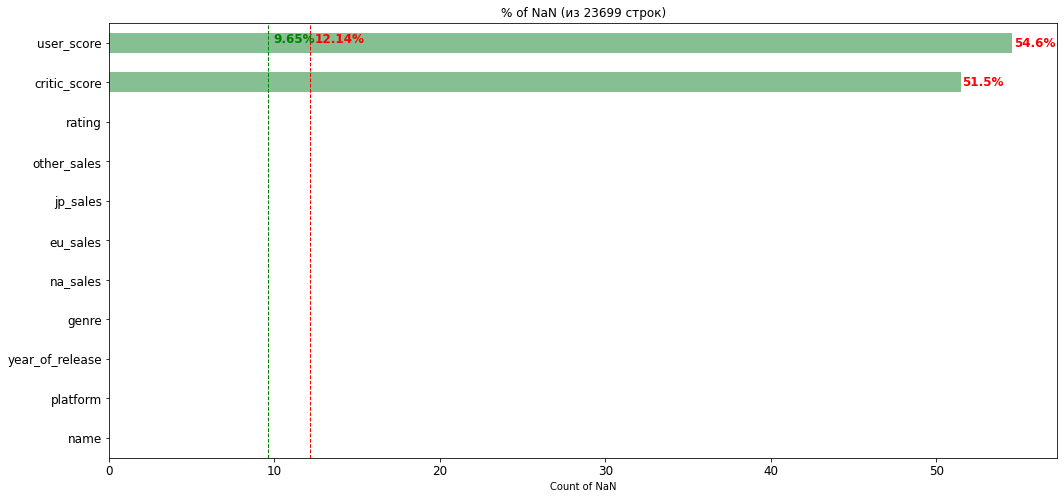

In [29]:
percent_hbar(df, threshold);

In [30]:
#Считаем долю чистых значений.
print('Доля чистых значений составила: {:.1%}'. format(len(df) / len(data)))

Доля чистых значений составила: 98.4%


В столбцах **name** и **genre** были пропуски платформы Gen в 1993 году. Почти по всем колонкам пропуск. Продажи маленькие. По данной ячейке мы не можем рассчитать среднее значение или медиану. Приняли решение удалить эти 2 строки, иначе они повлияют на нашу статистику. На счет появления пропуска в данном столбце можно сказать, что или его забыли указать при заведении данных.

Пропуски в столбце **year_of_release** удалили, так как их оказалось небольшое количество. Так как год не может быть дробным, значения year_of_release привели к целочисленному типу. Он менее ресурсозатратен.

Оставили пропуски в **user_score**, **critic_score** и в **rating**, так как заполнение их синтетическими значениями приведёт к искажению результатов анализа, а удаление их к потере большого количества данных. В **rating** поставили заглушку в виде значения no_rating.

Есть интересная закономерность в том, что часто оценки пользователей, критиков и рейтинга отсутствуют в одной и той же записи. Так как других закономерностей, которые объясняли бы пропуски, я не увидел, вероятнее всего отсутствие данных связано с ошибкой выгрузки или хранения.

Среднюю долю пропусков мы смогли снизить до 9,65%, при этом потеряли всего 1,6% данных.

### Подсчёт суммарных продаж.

Необходимо посчитать сумму продаж во всех регионах. Для этого суммируем значения нескольких столбцов (na_sales, eu_sales, jp_sales, other_sales) и полученные значения присвоить столбцу sum_sales_game.

In [31]:
#Посчитаем суммарные продажи во всех регионах.
df['sum_sales'] =  df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


## Исследовательский анализ данных.
- [x] Проанализировать сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- [x] Проанализировать как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- [x] Определить актуальный период в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывать в работе данные за предыдущие годы.
- [x] Проанализировать какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
- [x] Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
- [x] Проанализировать, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
- [x] Соотнести выводы с продажами игр на других платформах.
- [x] Проанализировать на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Анализ выпуска игр по годам.

Проанализируем, сколько игр выпускалось в разные годы.

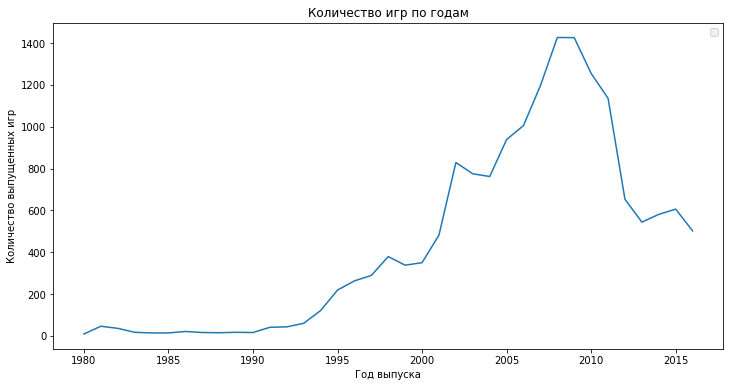

In [33]:
#Сделаем сводную таблицу по годам и количеству выпущеных игр.
games_by_year = df.pivot_table(index='year_of_release', values='name', aggfunc='count')

#Построим график по сводной таблице.
plt.figure(figsize=(12,6))
sns.lineplot(data=games_by_year)
sns.set_style('darkgrid')
plt.title("Количество игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend('');

Активный рост количества игр начался в 1990 году. Данные до этого года можно не учитывать в анализе.

После 2008 года начался активный спад выхода игр, вероятно это произошло ввиду мирового кризиса, но кризис прошёл, а тенденция продолжилась. Возможно причиной является увеличение количества платформ и, как следствие, распределение рынка. Сложнее выпускать много игр, если необходимо портировать их на все платформы. Возможно для прогноза на 2017 год будет полезнее взять данные с 2008 года.

### Анализ продаж игр по платформам.

Проанализируем как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

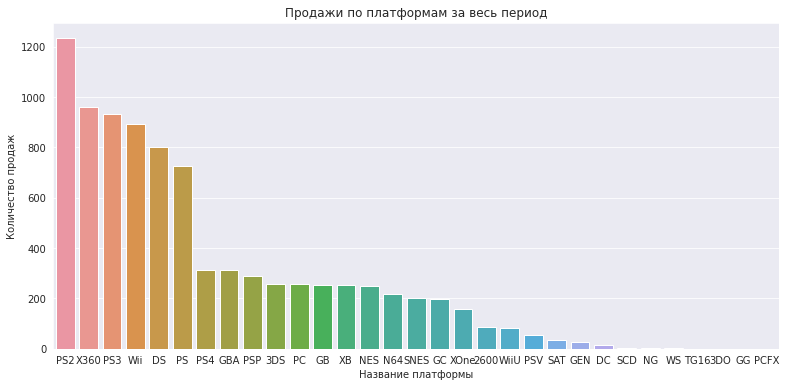

In [34]:
#Сделаем сводную таблицу по платформам и сумарным продажам, отсортировав её по сумарным продажам.
sales_by_platform = df.pivot_table(
    index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False)
#Построим график по сводной таблице.
plt.figure(figsize=(13,6))
sns.barplot(x=sales_by_platform.index,y=sales_by_platform['sum_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж");

Наиболее популярные с точки зрения продаж, платформы: 'PS2','X360','PS3','Wii','DS','PS'.

Оставим пока это так, но было бы странно строить прогноз на 2017 год полагаясь на продажи PS и PS2.

Построим распределение по годам, чтобы понять за какой характерный срок появляются новые и исчезают старые платформы.

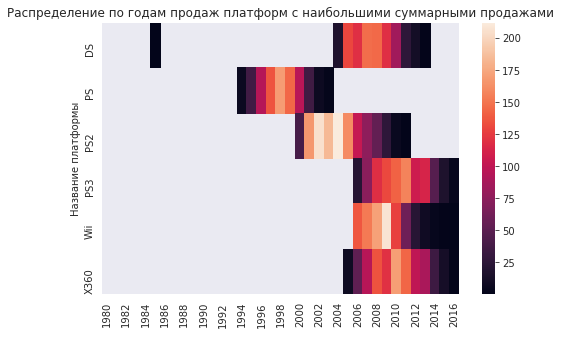

In [35]:
#Построим тепловую карту по сводной таблице выпуска игр по платформам с наибольшими суммарными продажами.
plt.figure(figsize=(8,5))
sns.heatmap(df.pivot_table(
    index="platform",columns='year_of_release',values='sum_sales',aggfunc=('sum')).query(
    'platform in ["PS2", "X360", "PS3", "Wii", "DS", "PS"]'))
plt.title("Распределение по годам продаж платформ с наибольшими суммарными продажами")
plt.xlabel(" ")
plt.ylabel("Название платформы");

По тепловой карте видно, что платформа в среднем живет 10-12 лет. Пик продаж приходит в среднем через 5-6 лет, т.е. в самой середине срока жизни.

Хорошо видна лестница из версий компании PS, которая начинает релиз новой платформы примерно через это время, когда начинается спад у предыдущей.

В 2004 на рынок вернулась платформа DS.

В 2006 появились новые платформы, которые завоевали популярность. Как раз в тот момент, когда продажи PS2 стали падать и когда запустили новую PS3.

Платформа Wii с первого года имела высокие продажи. Но постепенно ее продажи стали падать и падают до сих пор.

Кажется, что стоит посмотреть на все продажи для всех платформ с 2013 года, так как примерно в это время был перелом на графике выпуска по годам.

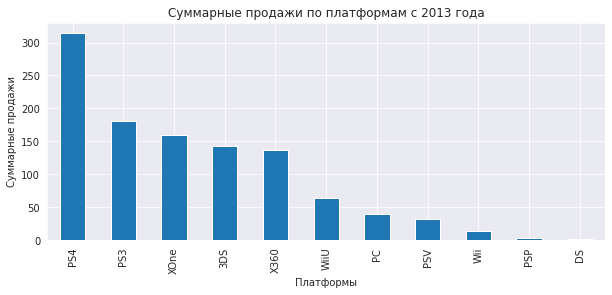

In [36]:
#Сделаем срез данным по 2013 году и сохраним в переменной current_period.
current_period = df.query('year_of_release >= 2013')

#Построим график суммарных продаж по платформам с 2008 года.
current_period.groupby('platform')['sum_sales'].sum().sort_values(
    ascending=False).plot(figsize=(10,4),
                          kind="bar",
                          title='Суммарные продажи по платформам с 2013 года')
plt.xlabel("Платформы")
plt.ylabel("Суммарные продажи");

Если ограничить выборку 2013 годом, то наиболее актуальными платформами являются 'PS4', 'PS3', 'XOne', '3DS', 'X360'. А отметку актуальности возьмём суммарные продажи выше 100 млн.копий, так как остальные платформы имеют продажи минимум вдвое меньше.

Посмотрим с помощью тепловой карты, какие из платформ лидируют по продажам, растут или падают, чтобы выбрать несколько потенциально прибыльных платформ. 

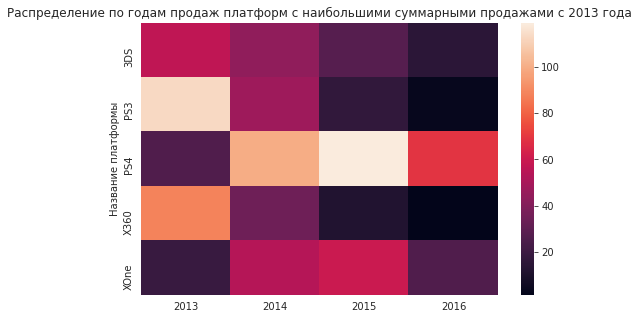

In [37]:
#Построим тепловую карту по сводной таблице выпуска игр по платформам с наибольшими суммарными продажами с 2013 года.
plt.figure(figsize=(8,5))
sns.heatmap(current_period.pivot_table(
    index="platform",columns='year_of_release',values='sum_sales',aggfunc=('sum')).query(
    'platform in ["PS4", "PS3", "XOne", "3DS", "X360"]'))
plt.title("Распределение по годам продаж платформ с наибольшими суммарными продажами с 2013 года")
plt.xlabel(" ")
plt.ylabel("Название платформы");

Наиболее актуальными платформой можно назвать PS4, XOne и 3DS.

Несмотря на то, что их продажи падают, они всё ещё выше значения в 20 млн. копий.

### Оценка разброса данных.
Построить диаграмму размаха по глобальным продажам игр в разбивке по платформам.

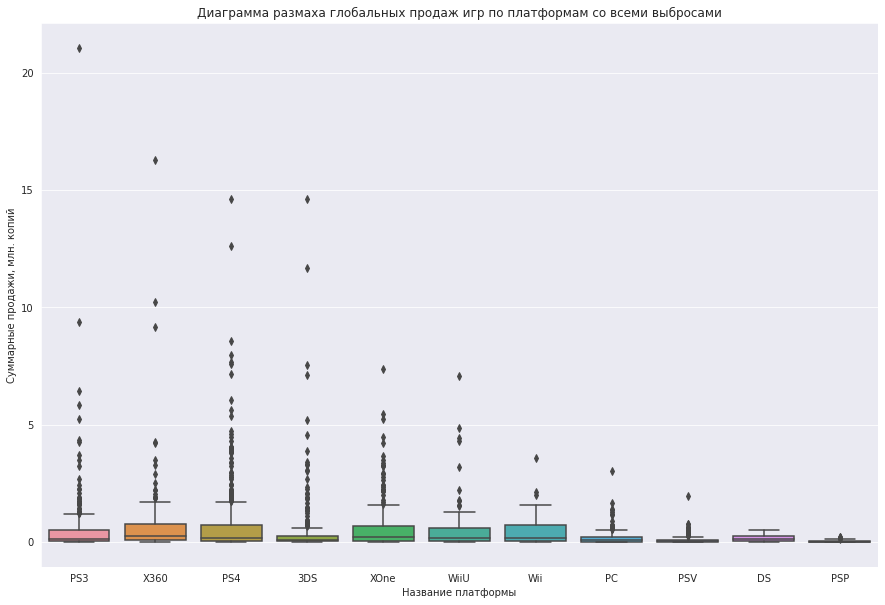

In [38]:
#Построим диаграмму размаха по глобальным продажам игр в разбивке по платформам.
plt.figure(figsize=(15,10))
plt.ylim()
sns.boxplot(x='platform',y='sum_sales',data=current_period)
plt.title("Диаграмма размаха глобальных продаж игр по платформам со всеми выбросами")
plt.xlabel("Название платформы")
plt.ylabel("Суммарные продажи, млн. копий");

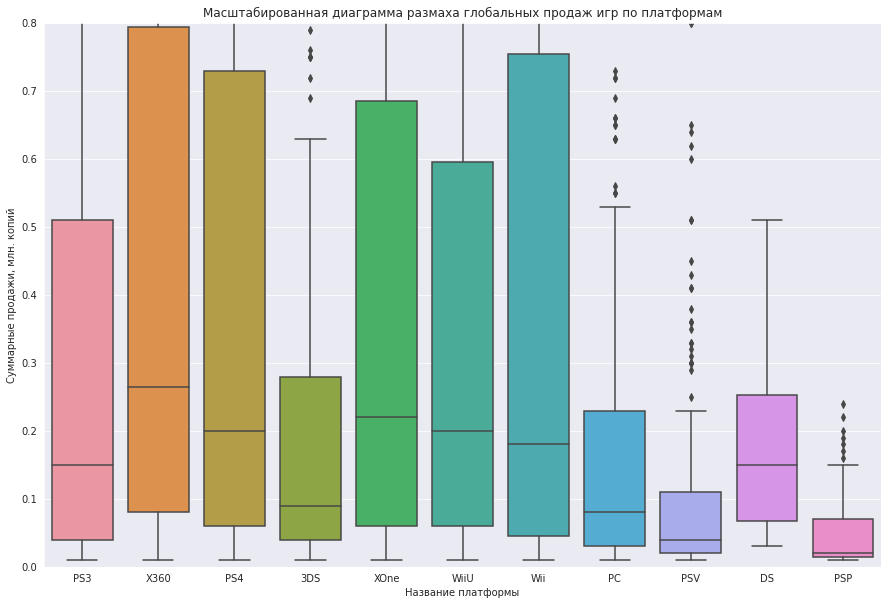

In [39]:
#Построим диаграмму размаха по глобальным продажам игр в разбивке по платформам.
plt.figure(figsize=(15,10))
plt.ylim(0,0.8)
sns.boxplot(x='platform',y='sum_sales',data=current_period)
plt.title("Масштабированная диаграмма размаха глобальных продаж игр по платформам")
plt.xlabel("Название платформы")
plt.ylabel("Суммарные продажи, млн. копий");

На полной диаграмме размаха мы видим, что наибольший размах имеют продажи платформ 'PS4', 'PS3', '3DS', 'X360'. При этом 'PS3' имеет очень сильный выброс более 20 млн. копий.

При масштабировании мы видим, что наиболее стабильной платформой является X360. Продажи этой платформы имеют самую высокую медиану, выше 2,5 млн. копий. Также продажи этой платформы имеют самы высокий 3-й квартиль - почти 8 млн. копий.

На втором месте также платформа от XBox - XOne. Медиана в выше 2 млн. копий, а 3-й квартиль доходит почти до 7 млн. копий.

### Анализ влияния на продажи отзывов пользователей и критиков.
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами, чтобы проанализировать, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

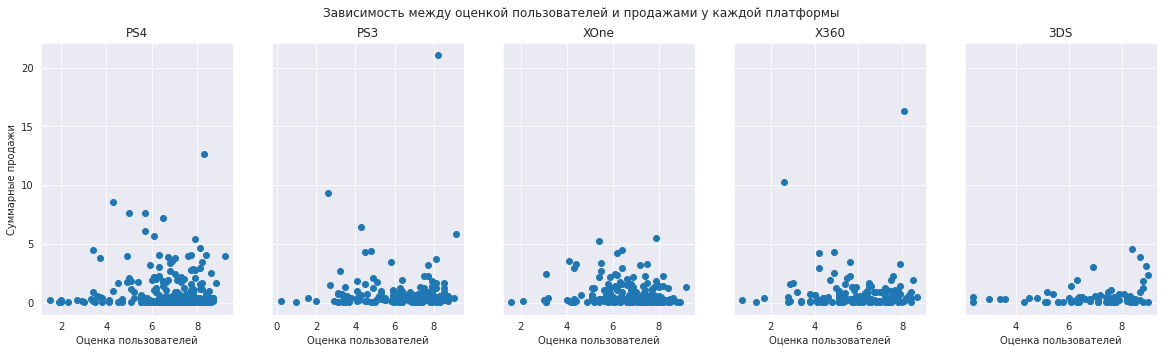

In [40]:
#Строим диаграммы рассеяния оценки критиков и продаж у каждой платформы.
popular_platforms_list = ['PS4', 'PS3', 'XOne', 'X360', '3DS']
fig, ax = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(20,5))
ax[0].scatter(data=current_period[current_period.platform=='PS4'], x='user_score',y='sum_sales')
ax[1].scatter(data=current_period[current_period.platform=='PS3'], x='user_score',y='sum_sales')
ax[2].scatter(data=current_period[current_period.platform=='XOne'], x='user_score',y='sum_sales')
ax[3].scatter(data=current_period[current_period.platform=='X360'], x='user_score',y='sum_sales')
ax[4].scatter(data=current_period[current_period.platform=='3DS'], x='user_score',y='sum_sales')
fig.suptitle('Зависимость между оценкой пользователей и продажами у каждой платформы')
ax[0].set_ylabel('Суммарные продажи')
for i,e in enumerate(ax[:]):
    e.set_xlabel('Оценка пользователей')
    platform_name = popular_platforms_list[i]
    e.set_title(platform_name)

Для большинства платформ заметна связь между оценками пользователей и суммарных продаж.

При этом наблюдается интересная картина с платформами XOne, там продажи показывают некоторую группировку в середине шкалы оценки.

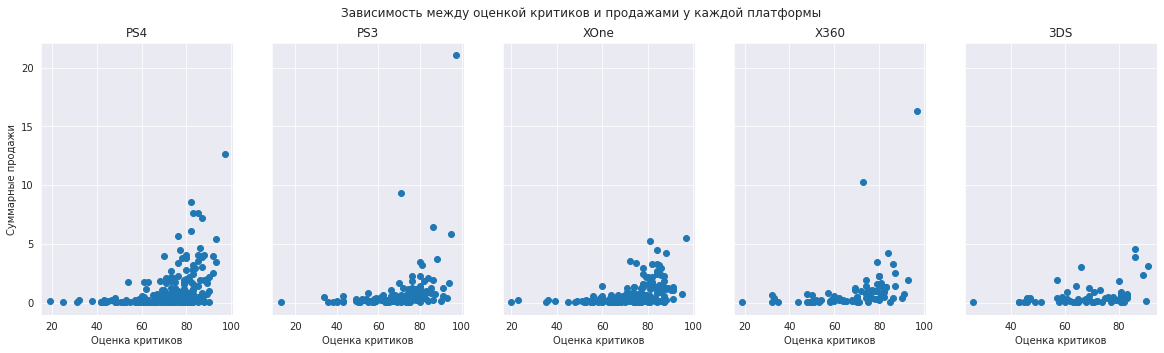

In [41]:
#Строим диаграммы рассеяния оценки критиков и продаж у каждой платформы.
fig, ax = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(20,5))

ax[0].scatter(data=current_period[current_period.platform=='PS4'], x='critic_score',y='sum_sales')
ax[1].scatter(data=current_period[current_period.platform=='PS3'], x='critic_score',y='sum_sales')
ax[2].scatter(data=current_period[current_period.platform=='XOne'], x='critic_score',y='sum_sales')
ax[3].scatter(data=current_period[current_period.platform=='X360'], x='critic_score',y='sum_sales')
ax[4].scatter(data=current_period[current_period.platform=='3DS'], x='critic_score',y='sum_sales')

fig.suptitle('Зависимость между оценкой критиков и продажами у каждой платформы')
ax[0].set_ylabel('Суммарные продажи')
for i,e in enumerate(ax[:]):
    e.set_xlabel('Оценка критиков')
    platform_name = popular_platforms_list[i]
    e.set_title(platform_name)

Для всех платформ заметна связь между оценками критиков и суммарных продаж. При этом у площадок PS3', 'PS4', 'XOne' эта связь более выражена ввиду большего количества продаж.

По обоим рейтингам заметно, что высокий рейтинг далеко не всегда означает большие продажи, но вот низкий рейтинг почти всегда сулит низкий уровень продаж.

In [42]:
#Считаем кореляцию между оценкой критиков и суммарными продажами.
print('Кореляции между оценкой критиков и суммарными продажами\n')
for platform in popular_platforms_list:
    print(f'Платформа: {platform}, уровень кореляции:',current_period[current_period['platform']==platform].corr(
    ).loc['critic_score', 'sum_sales'])

Кореляции между оценкой критиков и суммарными продажами

Платформа: PS4, уровень кореляции: 0.40656790206178123
Платформа: PS3, уровень кореляции: 0.3342853393371921
Платформа: XOne, уровень кореляции: 0.4169983280084021
Платформа: X360, уровень кореляции: 0.35034454602286624
Платформа: 3DS, уровень кореляции: 0.3570566142288098


In [43]:
#Считаем кореляцию между оценкой пользователей и суммарными продажами.
print('Кореляции между оценкой пользователей и суммарными продажами\n')
for platform in popular_platforms_list:
    print(f'Платформа: {platform}, уровень кореляции:',current_period[current_period['platform']==platform].corr(
    ).loc['user_score', 'sum_sales'])

Кореляции между оценкой пользователей и суммарными продажами

Платформа: PS4, уровень кореляции: -0.03195711020455685
Платформа: PS3, уровень кореляции: 0.002394402735756906
Платформа: XOne, уровень кореляции: -0.06892505328279543
Платформа: X360, уровень кореляции: -0.011742185147181627
Платформа: 3DS, уровень кореляции: 0.24150411773562974


Мы наблюдаем низкие корреляции, а где-то даже отрицательная корреляция. Но её значения не показательны. Низкие уровни кореляции могут быть обусловлены тем, что кореляции отображает силу линейной взаимосвязи, а у этих данных может быть другая зависимость.

### Анализ распределения игр по жанрам.
Проанализируем общее распределение игр по жанрам, чтобы понять выделяются ли жанры с высокими и низкими продажами.

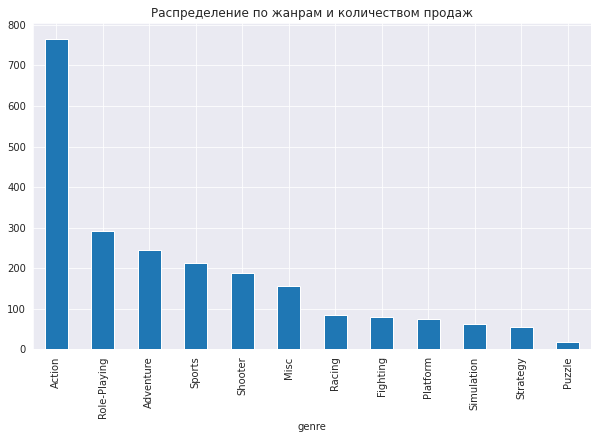

In [44]:
#Сгруппируем игры по жанрам и выделим количество продаж.
count_genre=current_period.groupby('genre')['sum_sales'].count().sort_values(ascending=False)

#Построим диаграмму распределения по жанрам и количеству продаж.
count_genre.plot(
    y='genre',grid=True,figsize=(10,6),kind='bar',title='Распределение по жанрам и количеством продаж');

Больше всего пользователи покупают игры в жанре Action, а меньше всего игры в жанре Platform. Разница в количестве продаж почти в 10 раз.

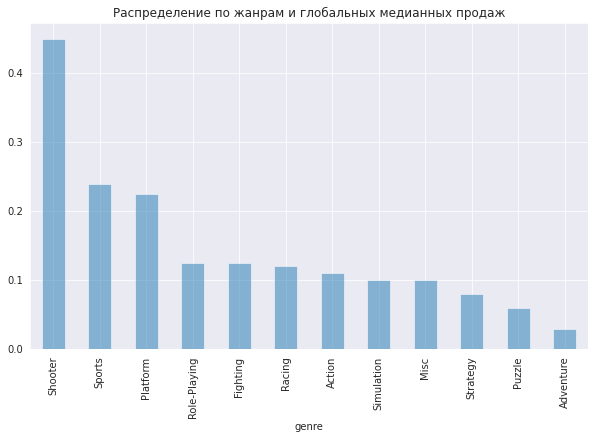

In [45]:
#Сгруппируем игры по жанрам и выделим медиану продаж.
median_sale_genre=current_period.groupby('genre')['sum_sales'].median().sort_values(ascending=False)

#Построим диаграмму распределения по жанрам и медиане продаж.
median_sale_genre.plot(
    y='genre',grid=True,figsize=(10,6),kind='bar',alpha=0.5,
    title='Распределение по жанрам и глобальных медианных продаж');

Играми с самысм высоким стабильным спросом являются игры в жанре shooter.

Тогда как самый покупаемый жанр Action существенно ниже.

При этом жанр Platform, который показал наименьшую покупаемость, оказался на втором месте.

Меньше всего медиана продаж у жанра Adventure.

### Промежуточный вывод.

**Анализ выпуска игр по годам.**
После 2008 года начался активный спад выхода игр, вероятно это произошло ввиду мирового кризиса, но кризис прошёл, а тенденция продолжилась. Возможно причиной является увеличение количества платформ и, как следствие, распределение рынка. Сложнее выпускать много игр, если необходимо портировать их на все платформы. Для прогноза на 2017 год будет полезнее взять данные с 2013 года.

**Анализ продаж игр по платформам**
За всю историю наблюдаемых данных, наиболее популярные с точки зрения продаж, платформы: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'. В среднем платформа актуальна 10-12 лет. Пик продаж приходит в среднем через 5-6 лет, т.е. в самой середине срока жизни. Компания PS, начинает релиз новой платформы примерно через это время, когда начинается спад у предыдущей. В 2004 на рынок вернулась платформа DS. В 2006 появились новые платформы, которые завоевали популярность. Как раз в тот момент, когда продажи PS2 стали падать и когда запустили новую PS3. Платформа Wii с первого года имела высокие продажи. Но постепенно ее продажи стали падать и падают до сих пор.

Если ограничить выборку 2013 годом, то наиболее актуальными платформами являются 'PS4', 'PS3', 'XOne', '3DS', 'X360'. А отметку актуальности возьмём суммарные продажи выше 100 млн.копий, так как остальные платформы имеют продажи минимум вдвое меньше. Наиболее актуальными платформой можно назвать PS4, XOne и 3DS. Несмотря на то, что их продажи падают, они всё ещё выше значения в 20 млн. копий.

**Оценка разброса данных.**
На полной диаграмме размаха мы видим, что наибольший размах имеют продажи платформ 'PS4', 'PS3', '3DS', 'X360'. При этом 'PS3' имеет очень сильный выброс более 20 млн. копий.

При масштабировании мы видим, что наиболее стабильной платформой является X360. Продажи этой платформы имеют самую высокую медиану, выше 2,5 млн. копий. Также продажи этой платформы имеют самы высокий 3-й квартиль - почти 8 млн. копий. На втором месте также платформа от XBox - XOne. Медиана в выше 2 млн. копий, а 3-й квартиль доходит почти до 7 млн. копий.

**Анализ влияния на продажи отзывов пользователей и критиков.**
Для большинства платформ заметна связь между оценками пользователей и суммарных продаж. При этом наблюдается интересная картина с платформами XOne, там продажи показывают некоторую группировку в середине шкалы оценки. Для всех платформ заметна связь между оценками критиков и суммарных продаж. При этом у площадок PS3', 'PS4', 'XOne' эта связь более выражена ввиду большего количества продаж. По обоим рейтингам заметно, что высокий рейтинг далеко не всегда означает большие продажи, но вот низкий рейтинг почти всегда сулит низкий уровень продаж.

Корреляции между рейтингами и продажами низкие корреляции, а где-то даже отрицательные. Но их значения не показательны. Низкие уровни кореляции могут быть обусловлены тем, что кореляции отображает силу линейной взаимосвязи, а у этих данных может быть другая зависимость.

**Анализ распределения игр по жанрам.**
Больше всего пользователи покупают игры в жанре Action, а меньше всего игры в жанре Puzzle. Разница в количестве продаж более чем в 10 раз. Что касается выручки от продаж, то тут можно сказать, что самым высоким является жанр shooter. 
Тогда как самый покупаемый жанр Action существенно ниже. Меньше всего выручки у жанра Adventure.


## Портрет пользователя каждого региона.
Определить для пользователя каждого региона (NA, EU, JP):
- [x] Самые популярные платформы (топ-5).
- [x] Самые популярные жанры (топ-5).
- [x] Определим влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Анализ популярности платформ.

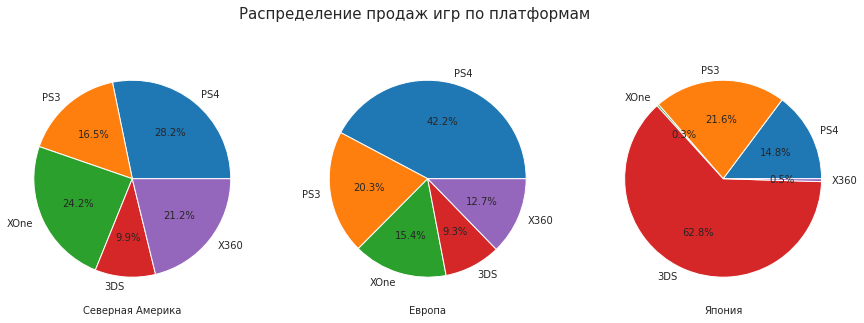

In [46]:
user_profile_platform = (current_period.groupby('platform').sum().sort_values('sum_sales', ascending=False)[['na_sales', 'eu_sales', 'jp_sales']]).head()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

user_profile_platform.plot.pie(y='na_sales', ax=ax[0], autopct='%1.1f%%')
user_profile_platform.plot.pie(y='eu_sales', ax=ax[1], autopct='%1.1f%%')
user_profile_platform.plot.pie(y='jp_sales', ax=ax[2], autopct='%1.1f%%')

ax[0].set(xlabel='Северная Америка')
ax[0].set(ylabel='')
ax[0].get_legend().remove()
ax[1].set(xlabel='Европа')
ax[1].set(ylabel='')
ax[1].get_legend().remove()
ax[2].set(xlabel='Япония')
ax[2].set(ylabel='')
ax[2].get_legend().remove()
fig.suptitle('Распределение продаж игр по платформам', fontsize=15)

plt.show()

В Северной Америке популярность платформ более-менее сбалансирована. PS4 - 28.2%, XOne - 24.2%, X360 - 21.2%, PS3 - 15.5% и 3DS - 9.9%.

В Европе есть существенный перекос в сторону PS4 - 42.2%. Следом идёт PS3 - 20.3%, затем XOne - 15.4%, X360 - 12.7% и 3DS - 9.3%.

В Японии наоборот, бесспорным лидером является 3DS - 62.8%. Следом идёт PS3 - 21.6%, затем PS4 - 14.8%. Платформы XBox практически не имеют доли: XOne - 0.3%, X360 - 0.5%.

### Анализ популярности жанров.

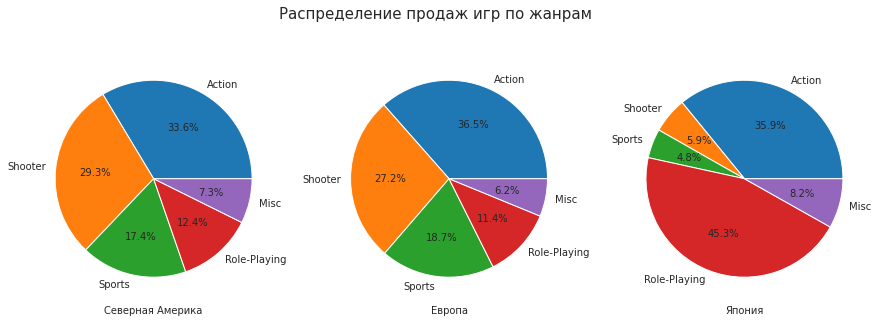

In [47]:
user_profile_genre = (current_period.groupby('genre').sum().sort_values(
    'sum_sales', ascending=False)[['na_sales', 'eu_sales', 'jp_sales']]).head()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

user_profile_genre.plot.pie(y='na_sales', ax=ax[0], autopct='%1.1f%%')
user_profile_genre.plot.pie(y='eu_sales', ax=ax[1], autopct='%1.1f%%')
user_profile_genre.plot.pie(y='jp_sales', ax=ax[2], autopct='%1.1f%%')

ax[0].set(xlabel='Северная Америка')
ax[0].set(ylabel='')
ax[0].get_legend().remove()
ax[1].set(xlabel='Европа')
ax[1].set(ylabel='')
ax[1].get_legend().remove()
ax[2].set(xlabel='Япония')
ax[2].set(ylabel='')
ax[2].get_legend().remove()
fig.suptitle('Распределение продаж игр по жанрам', fontsize=15)

plt.show()

Наиболее популярные жанры в Америке и в Европе предпочитают это Экшн, Шутеры и Спорт.

В Японии наиболее популярны Ролевые игры и Экшн. На третьем месчте с большим отрывом Misc.

### Анализ  влияния рейтинга ESRB на продажи в отдельном регионе.

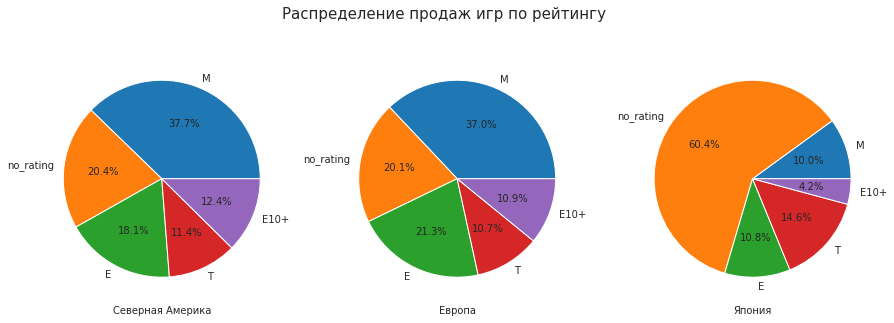

In [48]:
user_profile_rating = (current_period.groupby('rating').sum().sort_values(
    'sum_sales', ascending=False)[['na_sales', 'eu_sales', 'jp_sales']]).head()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

user_profile_rating.plot.pie(y='na_sales', ax=ax[0], autopct='%1.1f%%')
user_profile_rating.plot.pie(y='eu_sales', ax=ax[1], autopct='%1.1f%%')
user_profile_rating.plot.pie(y='jp_sales', ax=ax[2], autopct='%1.1f%%')

ax[0].set(xlabel='Северная Америка')
ax[0].set(ylabel='')
ax[0].get_legend().remove()
ax[1].set(xlabel='Европа')
ax[1].set(ylabel='')
ax[1].get_legend().remove()
ax[2].set(xlabel='Япония')
ax[2].set(ylabel='')
ax[2].get_legend().remove()
fig.suptitle('Распределение продаж игр по рейтингу', fontsize=15)

plt.show()

Можно сказать, что на продажи в Америке и Европе влияет рейтинг ESRB влияетсильно влияет на продажи. Большая часть проданных игр имеет рейтинг M «Для взрослых» - 37.7%, на втором месте игры с рейтингом E «Для всех» - 18.1%. Однако игры без рейтинга тоже могут пользоваться спросом. В этих двух регионах игры без рейтинга занимают около 20%. Что логично, так как не все игры получают рейтинг. Например он-лайн играм не присваевается рейтинг. Кроме того, по ESRB рейтингуются игры для рынков США и Канады. В Европе используется рейтинг PEGI. Следовательно рейтинг ESRB присваивается для офлайн игр, которые выходят на рынок США и Канады.

Ровно по этой причине, продажи игр в Японии не зависит от рейтинга ESRB. Учитывая, что там наиболее популярна платформа 3DS и игры в жанре Role-Playing, этот рынок сильно отличается. А значит меньше игр, которые выпускаются в Японии выходят и на рынок Северной Америки, следовательно рейтинговать их по ESRB нет необходимости.

### Промежуточный вывод.
**Популярность площадок**
В Северной Америке популярность платформ более-менее сбалансирована. PS4 - 28.2%, XOne - 24.2%, X360 - 21.2%, PS3 - 15.5% и 3DS - 9.9%.
В Европе есть существенный перекос в сторону PS4 - 42.2%. Следом идёт PS3 - 20.3%, затем XOne - 15.4%, X360 - 12.7% и 3DS - 9.3%.
В Японии наоборот, бесспорным лидером является 3DS - 62.8%. Следом идёт PS3 - 21.6%, затем PS4 - 14.8%. Платформы XBox практически не имеют доли: XOne - 0.3%, X360 - 0.5%.

**Популярность жанров**
Наиболее популярные жанры в Америке и в Европе предпочитают это Экшн, Шутеры и Спорт.
В Японии наиболее популярны Ролевые игры и Экшн. На третьем месчте с большим отрывом Misc.

**Анализ влияния рейтинга ESRB на продажи в отдельном регионе**
Можно сказать, что на продажи в Америке и Европе влияет рейтинг ESRB влияетсильно влияет на продажи. Большая часть проданных игр имеет рейтинг M «Для взрослых» - 37.7%, на втором месте игры с рейтингом E «Для всех» - 18.1%. Однако игры без рейтинга тоже могут пользоваться спросом. В этих двух регионах игры без рейтинга занимают около 20%. Что логично, так как не все игры получают рейтинг. Например он-лайн играм не присваевается рейтинг. Кроме того, по ESRB рейтингуются игры для рынков США и Канады. В Европе используется рейтинг PEGI. Следовательно рейтинг ESRB присваивается для офлайн игр, которые выходят на рынок США и Канады.

Ровно по этой причине, продажи игр в Японии не зависит от рейтинга ESRB. Учитывая, что там наиболее популярна платформа 3DS и игры в жанре Role-Playing, этот рынок сильно отличается. А значит меньше игр, которые выпускаются в Японии выходят и на рынок Северной Америки, следовательно рейтинговать их по ESRB нет необходимости.

## Проверка гипотез.
- [x] Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- [x] Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем нулевые гипотезы:
* Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Нулевая гипотеза по определению должна быть со знаком равенства, а в альтернативную мы уже закладываем смысл, который нам нужен.

Для сравнения статистик двух выборок нужно использовать t-test.

In [49]:
alpha = 0.01

a = current_period.loc[current_period['platform']=='XOne'].user_score.dropna().values
b = current_period.loc[current_period['platform']=='PC'].user_score.dropna().values

if ttest_ind(a,b).pvalue>alpha:
    print('Не можем отклонить нулевую гипотезу')
else:
    print('Отклоняем нулевую гипотезу о равенстве средних')

Не можем отклонить нулевую гипотезу


### Средние пользовательские рейтинги жанров Action и Sports разные.
Сформулируем нулевые гипотезы:
* Нулевая гипотеза H₀: Средний пользовательский рейтинг жанра Action == средний пользовательский рейтинг жанра Sports.
* Альтернативная гипотеза H₁: Средний пользовательский рейтинг жанра Action != средний пользовательский рейтинг жанра Sports.

Нулевая гипотеза по определению должна быть со знаком равенства, а в альтернативную мы уже закладываем смысл, который нам нужен.

Для сравнения статистик двух выборок нужно использовать t-test.

Чтобы правильно проверить через Т-критерий Стьюдента, надо уточнить аргумент equal_var в функции. equal_var говорит о равенстве дисперсий 2 выборок. Так что пока проверим равенство их дисперсий.

* Нулевая гипотеза H₀: дисперсии выборок равны.
* Альтернативная гипотеза H₁: дисперсии не равны.

In [50]:
alpha= 0.05
a = current_period.loc[current_period['genre']=='Action'].user_score.dropna().values
b = current_period.loc[current_period['genre']=='Sports'].user_score.dropna().values



if levene(a,b).pvalue>alpha:
    print('Не можем отклонить нулевую гипотезу')
else:
    print('Отклоняем нулевую гипотезу о равенстве дисперсий')

Отклоняем нулевую гипотезу о равенстве дисперсий


Необходимо выставить параметр equal_var функции ttest_ind в значение False.

In [51]:
alpha = 0.01


a = current_period.loc[current_period['genre']=='Action'].user_score.dropna().values
b = current_period.loc[current_period['genre']=='Sports'].user_score.dropna().values

if ttest_ind(a,b,equal_var=False).pvalue>alpha:
    print('Не можем отклонить нулевую гипотезу')
else:
    print('Отклоняем нулевую гипотезу о равенстве средних')

Отклоняем нулевую гипотезу о равенстве средних


### Промежуточный вывод.
Гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые мы отклонить не можем.
Гипотезы сформулировали так:
- Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные можем отклонить.
Гипотезы сформулировали так:
- Нулевая гипотеза H₀: Средний пользовательский рейтинг жанра Action == средний пользовательский рейтинг жанра Sports.
- Альтернативная гипотеза H₁: Средний пользовательский рейтинг жанра Action != средний пользовательский рейтинг жанра Sports.

Нулевая гипотеза по определению должна быть со знаком равенства, а в альтернативную мы уже закладываем смысл, который нам нужен.

Для сравнения статистик двух выборок нужно использовать t-test.

## Общий вывод

**Анализ выпуска игр по годам.**
После 2008 года начался активный спад выхода игр, вероятно это произошло ввиду мирового кризиса, но кризис прошёл, а тенденция продолжилась. Возможно причиной является увеличение количества платформ и, как следствие, распределение рынка. Сложнее выпускать много игр, если необходимо портировать их на все платформы. Для прогноза на 2017 год будет полезнее взять данные с 2013 года.

**Анализ продаж игр по платформам**
За всю историю наблюдаемых данных, наиболее популярные с точки зрения продаж, платформы: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'. В среднем платформа актуальна 10-12 лет. Пик продаж приходит в среднем через 5-6 лет, т.е. в самой середине срока жизни. Компания PS, начинает релиз новой платформы примерно через это время, когда начинается спад у предыдущей. В 2004 на рынок вернулась платформа DS. В 2006 появились новые платформы, которые завоевали популярность. Как раз в тот момент, когда продажи PS2 стали падать и когда запустили новую PS3. Платформа Wii с первого года имела высокие продажи. Но постепенно ее продажи стали падать и падают до сих пор.

Если ограничить выборку 2013 годом, то наиболее актуальными платформами являются 'PS4', 'PS3', 'XOne', '3DS', 'X360'. А отметку актуальности возьмём суммарные продажи выше 100 млн.копий, так как остальные платформы имеют продажи минимум вдвое меньше. Наиболее актуальными платформой можно назвать PS4, XOne и 3DS. Несмотря на то, что их продажи падают, они всё ещё выше значения в 20 млн. копий.

**Оценка разброса данных.**
На полной диаграмме размаха мы видим, что наибольший размах имеют продажи платформ 'PS4', 'PS3', '3DS', 'X360'. При этом 'PS3' имеет очень сильный выброс более 20 млн. копий. При масштабировании мы видим, что наиболее стабильной платформой является X360. Продажи этой платформы имеют самую высокую медиану, выше 2,5 млн. копий. Также продажи этой платформы имеют самы высокий 3-й квартиль - почти 8 млн. копий. На втором месте также платформа от XBox - XOne. Медиана в выше 2 млн. копий, а 3-й квартиль доходит почти до 7 млн. копий.

**Анализ влияния на продажи отзывов пользователей и критиков.**
Для большинства платформ заметна связь между оценками пользователей и суммарных продаж. При этом наблюдается интересная картина с платформами XOne, там продажи показывают некоторую группировку в середине шкалы оценки. Для всех платформ заметна связь между оценками критиков и суммарных продаж. При этом у площадок PS3', 'PS4', 'XOne' эта связь более выражена ввиду большего количества продаж. По обоим рейтингам заметно, что высокий рейтинг далеко не всегда означает большие продажи, но вот низкий рейтинг почти всегда сулит низкий уровень продаж.

Корреляции между рейтингами и продажами низкие корреляции, а где-то даже отрицательные. Но их значения не показательны. Низкие уровни кореляции могут быть обусловлены тем, что кореляции отображает силу линейной взаимосвязи, а у этих данных может быть другая зависимость.

**Анализ распределения игр по жанрам.**
Больше всего пользователи покупают игры в жанре Action, а меньше всего игры в жанре Puzzle. Разница в количестве продаж более чем в 10 раз. Что касается выручки от продаж, то тут можно сказать, что самым высоким является жанр shooter. Тогда как самый покупаемый жанр Action существенно ниже. Меньше всего выручки у жанра Adventure.

**Популярность площадок**
В Северной Америке популярность платформ более-менее сбалансирована. PS4 - 28.2%, XOne - 24.2%, X360 - 21.2%, PS3 - 15.5% и 3DS - 9.9%.
В Европе есть существенный перекос в сторону PS4 - 42.2%. Следом идёт PS3 - 20.3%, затем XOne - 15.4%, X360 - 12.7% и 3DS - 9.3%.
В Японии наоборот, бесспорным лидером является 3DS - 62.8%. Следом идёт PS3 - 21.6%, затем PS4 - 14.8%. Платформы XBox практически не имеют доли: XOne - 0.3%, X360 - 0.5%.

**Популярность жанров**
Наиболее популярные жанры в Америке и в Европе предпочитают это Экшн, Шутеры и Спорт.
В Японии наиболее популярны Ролевые игры и Экшн. На третьем месчте с большим отрывом Misc.

**Влияние рейтинга ESRB на продажи**
Можно сказать, что на продажи в Америке и Европе влияет рейтинг ESRB влияетсильно влияет на продажи. Большая часть проданных игр имеет рейтинг M «Для взрослых» - 37.7%, на втором месте игры с рейтингом E «Для всех» - 18.1%. Однако игры без рейтинга тоже могут пользоваться спросом. В этих двух регионах игры без рейтинга занимают около 20%. Что логично, так как не все игры получают рейтинг. Например он-лайн играм не присваевается рейтинг. Кроме того, по ESRB рейтингуются игры для рынков США и Канады. В Европе используется рейтинг PEGI. Следовательно рейтинг ESRB присваивается для офлайн игр, которые выходят на рынок США и Канады.

Ровно по этой причине, продажи игр в Японии не зависит от рейтинга ESRB. Учитывая, что там наиболее популярна платформа 3DS и игры в жанре Role-Playing, этот рынок сильно отличается. А значит меньше игр, которые выпускаются в Японии выходят и на рынок Северной Америки, следовательно рейтинговать их по ESRB нет необходимости.

Гипотезу о том, что **средние пользовательские рейтинги платформ Xbox One и PC одинаковые** мы отклонить не можем.

Гипотезу о том, что **средние пользовательские рейтинги жанров Action и Sports разные** можем отклонить.